#Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Importing Dataset

In [ ]:
data_loc='http://bit.ly/w-data'
dataset=pd.read_csv(data_loc)
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#Extracting Independent variable(x) and Dependent variable(y)

In [ ]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

#plotting scores with respect to hours studied

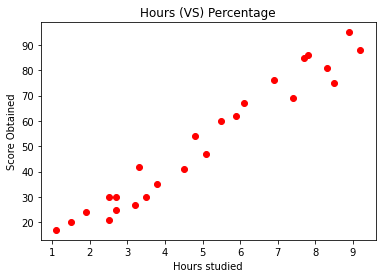

In [ ]:
plt.scatter(x,y,c='r')
plt.title("Hours (VS) Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Score Obtained")
plt.show()

#Splitting the data into training and test set

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#Training the model 

In [ ]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#predicting the score(y_pred) for x_test 

In [ ]:
y_pred=regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

[[20.   16.88]
 [27.   33.73]
 [69.   75.36]
 [30.   26.79]
 [62.   60.49]]


#Comparing y_test with the predicted value(y_pred)

In [ ]:
dt=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
dt

,y_test,y_pred
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#Predicting Slope and Y-intercept fot the best fitted line

In [ ]:
slope=regressor.coef_
y_intercept=regressor.intercept_
line=(slope*x)+y_intercept  # Line_Equation

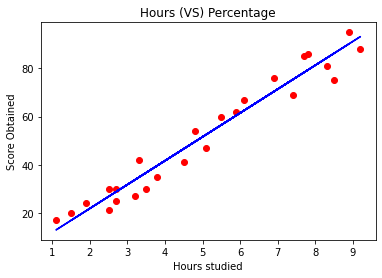

In [ ]:
plt.scatter(x,y,c='r')
plt.plot(x,line,c='b')
plt.title("Hours (VS) Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Score Obtained")
plt.show()

#Predicting score for single data

In [ ]:
hour=9.25
percentage=regressor.predict([[hour]])
print("the student obtained {} percentage by studying {} hours".format(percentage[0],hour))

the student obtained 93.69173248737539 percentage by studying 9.25 hours


#Evaluating model performance

In [ ]:
r_score=r2_score(y_test,y_pred)
print(r_score)

0.9454906892105354
